# Assignment 3
## Mike Johnson
### February 10, 2025

****

In [1]:
# Import libraries
import pandas as pd
import sqlite3
from plotnine import *

In [2]:
# Load sql extension
%load_ext sql

In [3]:
# Connect to airline_industry.db
%sql sqlite:///airline_industry.db

Connecting to 'sqlite:///airline_industry.db'

In [4]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

#### 1. How many records are in each table in the database?

In [5]:
%%sql

SELECT 
    COUNT(*) AS 'airlines_cnt'
FROM airlines;

Running query in 'sqlite:///airline_industry.db'

airlines_cnt
16


In [6]:
%%sql

SELECT 
    COUNT(*) AS 'airports_cnt'
FROM airports;

Running query in 'sqlite:///airline_industry.db'

airports_cnt
1458


In [7]:
%%sql

SELECT 
    COUNT(*) AS 'flights_cnt'
FROM flights;

Running query in 'sqlite:///airline_industry.db'

flights_cnt
336776


In [8]:
%%sql

SELECT 
    COUNT(*) AS 'planes_cnt'
FROM planes;

Running query in 'sqlite:///airline_industry.db'

planes_cnt
3322


In [9]:
%%sql

SELECT 
    COUNT(*) AS 'weather_cnt'
FROM weather;

Running query in 'sqlite:///airline_industry.db'

weather_cnt
26115


****

#### 2. Did any flights depart and arrive exactly on time?

In [10]:
%%sql

SELECT
    COUNT(*) AS 'on_time_cnt'
FROM flights
WHERE 
    dep_delay = 0
    AND arr_delay = 0;

Running query in 'sqlite:///airline_industry.db'

on_time_cnt
347


Yes, 347 flights departed and arrived on time.

****


#### 3. What is the mean arrival delay among flights?

In [11]:
%%sql

SELECT
    AVG(arr_delay) AS 'mean_arr_delay'
FROM flights;

Running query in 'sqlite:///airline_industry.db'

mean_arr_delay
6.702300639000404


****

#### 4. How many flights had above average arrival delays?

In [12]:
%%sql

SELECT
    COUNT(*) AS 'above_avg_delays'
FROM flights
WHERE arr_delay > (SELECT AVG(arr_delay) AS 'mean_arr_delay'
    FROM flights); 

Running query in 'sqlite:///airline_industry.db'

above_avg_delays
115257


****

#### 5. What is the relationship between temperature and wind speed? Do changes in the mean temperature throughout the year (by month) move reflect changes in mean wind speed?

In [13]:
%%sql q5_result <<

SELECT
    month,
    AVG(temp) AS 'mean_temp',
    AVG(wind_speed) AS 'mean_wind_speed'
FROM weather
GROUP BY month
ORDER BY month;

Running query in 'sqlite:///airline_industry.db'

In [14]:
# Load results into a dataframe.
q5_df = q5_result.DataFrame()
q5_df

,month,mean_temp,mean_wind_speed
0,1,35.635660,11.183658
1,2,34.270597,12.674038
2,3,39.880072,12.923151
3,4,51.745642,11.098444
4,5,61.795000,9.516621
5,6,72.184000,10.263253
6,7,80.066221,9.573477
7,8,74.434876,8.611904
8,9,67.371292,8.906685
9,10,60.071130,9.702033


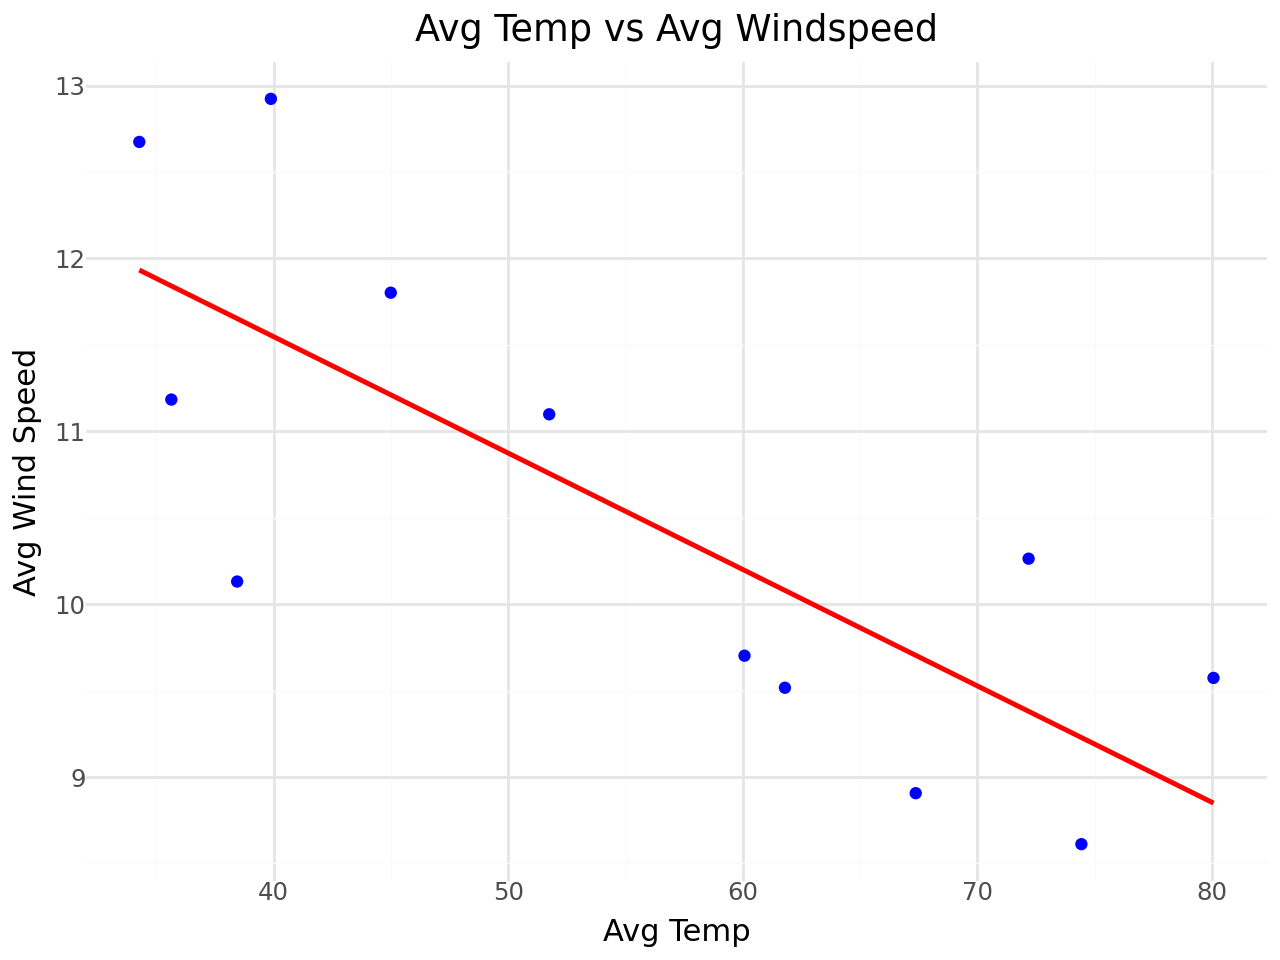

In [15]:
# Visualize results
q5_plot = (
    ggplot(q5_df, aes(x = 'mean_temp', y = 'mean_wind_speed')) +
    geom_point(color = 'blue') +
    geom_smooth(method = 'lm', color = 'red', se = False) +
    labs(title = 'Avg Temp vs Avg Windspeed',
         x = 'Avg Temp',
         y = 'Avg Wind Speed') +
    theme_minimal()
)

q5_plot

Yes, as average temperature increases, average windspeed decreases.

****

#### 6. Print the first 5 rows of flights and airlines. Does the flights table contain the full name of the airline? If so, print them. If not, write a query to return the first 10 records in the flights data with the following columns: the origin, destination, carrier, flight number, and full name of the airline for each flight in a single table.

In [16]:
%%sql

SELECT *
FROM flights
LIMIT 5;

Running query in 'sqlite:///airline_industry.db'

field1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [17]:
%%sql

SELECT *
FROM airlines
LIMIT 5;

Running query in 'sqlite:///airline_industry.db'

field1,carrier,name
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.


In [18]:
%%sql

SELECT
    f.origin,
    f.dest as 'destination',
    f.carrier,
    f.flight,
    a.name
FROM flights as f
LEFT JOIN airlines as a
ON f.carrier = a.carrier
LIMIT 10;


Running query in 'sqlite:///airline_industry.db'

origin,destination,carrier,flight,name
EWR,IAH,UA,1545,United Air Lines Inc.
LGA,IAH,UA,1714,United Air Lines Inc.
JFK,MIA,AA,1141,American Airlines Inc.
JFK,BQN,B6,725,JetBlue Airways
LGA,ATL,DL,461,Delta Air Lines Inc.
EWR,ORD,UA,1696,United Air Lines Inc.
EWR,FLL,B6,507,JetBlue Airways
LGA,IAD,EV,5708,ExpressJet Airlines Inc.
JFK,MCO,B6,79,JetBlue Airways
LGA,ORD,AA,301,American Airlines Inc.


****

#### 7. Your supervisor is interested in the airlines that offer the most flights in peak periods. Write a query that returns the number of flights each airline operates in December. The results should be a single table that contains five columns: carrier, month, name, and num_flights. The results should be limited to 10 and shown in descending order by number of flights.

In [19]:
%%sql

SELECT
    f.carrier,
    f.month,
    a.name,
    COUNT(*) AS num_flights
FROM flights as f
LEFT JOIN airlines as a
ON f.carrier = a.carrier
WHERE month = 12
GROUP BY 
    f.carrier,
    a.name
ORDER BY num_flights DESC
LIMIT 10;

Running query in 'sqlite:///airline_industry.db'

carrier,month,name,num_flights
UA,12,United Air Lines Inc.,4931
B6,12,JetBlue Airways,4741
EV,12,ExpressJet Airlines Inc.,4307
DL,12,Delta Air Lines Inc.,4093
AA,12,American Airlines Inc.,2705
MQ,12,Envoy Air,2139
9E,12,Endeavor Air Inc.,1633
US,12,US Airways Inc.,1605
WN,12,Southwest Airlines Co.,1099
VX,12,Virgin America,476


****

#### 8. Use pandas to connect to the database. Define a function that takes one argument--month_num--called num_flights_fun that uses pandas' `.read_sql_query()` and runs a query that returns the number of flights each airline operates in whatever month is specified in the function call. The result should be returned as a pandas dataframe that contains five columns: carrier, month, name, and num_flights.

In [20]:
# Define function that takes the month_num and returns the number of flights each airline operates in that month.
def num_flights_fun(month_num):
    # Connection to database
    conn = sqlite3.connect('airline_industry.db')

    # SQL query to get the number of flights each airline operates in the specified month
    query = f"""
    SELECT
        f.carrier,
        f.month,
        a.name,
        COUNT(*) AS num_flights
    FROM flights as f
    LEFT JOIN airlines as a
    ON f.carrier = a.carrier
    WHERE f.month = '{month_num}'
    GROUP BY 
        f.carrier, 
        a.name
    ORDER BY num_flights DESC;
    """

    # Store the result in a dataframe
    result_df = pd.read_sql_query(query, conn)

    # Close db connection
    conn.close()

    # Return the dataframe
    return result_df

In [21]:
num_flights_fun(11)

,carrier,month,name,num_flights
0,UA,11,United Air Lines Inc.,4854
1,EV,11,ExpressJet Airlines Inc.,4471
2,B6,11,JetBlue Airways,4289
3,DL,11,Delta Air Lines Inc.,3849
4,AA,11,American Airlines Inc.,2577
5,MQ,11,Envoy Air,2056
6,US,11,US Airways Inc.,1699
7,9E,11,Endeavor Air Inc.,1595
8,WN,11,Southwest Airlines Co.,1033
9,VX,11,Virgin America,451
